# Cobify - Technical Challenge
3 hour

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import re
import csv

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import logistic

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import dataset(s)   

In [14]:
#Import CSV to a Dataframe
gas_consum_df = pd.read_csv('data/measurements.csv')
gas_consum_df

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0         28       5     26        21,5            12      NaN      E10   0   
1         12     4,2     30        21,5            13      NaN      E10   0   
2       11,2     5,5     38        21,5            15      NaN      E10   0   
3       12,9     3,9     36        21,5            14      NaN      E10   0   
4       18,5     4,5     46        21,5            15      NaN      E10   0   
..       ...     ...    ...         ...           ...      ...      ...  ..   
383       16     3,7     39        24,5            18      NaN     SP98   0   
384     16,1     4,3     38          25            31       AC     SP98   1   
385       16     3,8     45          25            19      NaN     SP98   0   
386     15,4     4,6     42          25            31       AC     SP98   1   
387     14,7       5     25          25            30       AC     SP98   1   

     rain  sun refill liters refill gas  
0       0    0            45        E10  
1       0    0           NaN        NaN  
2       0    0           NaN        NaN  
3       0    0           NaN        NaN  
4       0    0           NaN        NaN  
..    ...  ...           ...        ...  
383     0    0           NaN        NaN  
384     0    0           NaN        NaN  
385     0    0           NaN        NaN  
386     0    0           NaN        NaN  
387     0    0           NaN        NaN  

[388 rows x 12 columns]

In [15]:
gas_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [18]:
# Info above shows that Distance, consume, temp_inside, refill liters should be converted to numerical. Let's remplace commas first
columns_to_num = ['distance', 'consume', 'temp_inside', 'refill liters']
gas_consum_df[columns_to_num] = gas_consum_df[columns_to_num].replace(',', '.', regex=True)
gas_consum_df

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0         28       5     26        21.5            12      NaN      E10   0   
1         12     4.2     30        21.5            13      NaN      E10   0   
2       11.2     5.5     38        21.5            15      NaN      E10   0   
3       12.9     3.9     36        21.5            14      NaN      E10   0   
4       18.5     4.5     46        21.5            15      NaN      E10   0   
..       ...     ...    ...         ...           ...      ...      ...  ..   
383       16     3.7     39        24.5            18      NaN     SP98   0   
384     16.1     4.3     38          25            31       AC     SP98   1   
385       16     3.8     45          25            19      NaN     SP98   0   
386     15.4     4.6     42          25            31       AC     SP98   1   
387     14.7       5     25          25            30       AC     SP98   1   

     rain  sun refill liters refill gas  
0       0    0            45        E10  
1       0    0           NaN        NaN  
2       0    0           NaN        NaN  
3       0    0           NaN        NaN  
4       0    0           NaN        NaN  
..    ...  ...           ...        ...  
383     0    0           NaN        NaN  
384     0    0           NaN        NaN  
385     0    0           NaN        NaN  
386     0    0           NaN        NaN  
387     0    0           NaN        NaN  

[388 rows x 12 columns]

In [19]:
#Now convert columns to numeric
gas_consum_df[columns_to_num] = gas_consum_df[columns_to_num].apply(pd.to_numeric, errors='coerce')

#Check result
gas_consum_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [21]:
# Filter the DataFrame based on the 'gas_type' column
df_e10 = gas_consum_df[gas_consum_df['gas_type'] == 'E10']
df_sp98 = gas_consum_df[gas_consum_df['gas_type'] == 'SP98']

In [22]:
df_e10.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  160.000000  160.000000  160.000000   157.000000    160.000000   
mean    21.096250    4.931250   43.506250    21.917197     10.118750   
std     20.307234    0.900956   14.077949     0.659854      6.392185   
min      1.700000    3.700000   14.000000    21.000000     -5.000000   
25%     12.075000    4.400000   35.000000    21.500000      6.000000   
50%     15.400000    4.800000   42.000000    21.500000      9.000000   
75%     21.200000    5.300000   51.000000    22.500000     14.250000   
max    130.300000   10.800000   88.000000    25.000000     27.000000   

               AC        rain         sun  refill liters  
count  160.000000  160.000000  160.000000       5.000000  
mean     0.043750    0.100000    0.075000      39.600000  
std      0.205181    0.300942    0.264218       3.056959  
min      0.000000    0.000000    0.000000      37.700000  
25%      0.000000    0.000000    0.000000      38.000000  
50%      0.000000    0.000000    0.000000      38.300000  
75%      0.000000    0.000000    0.000000      39.000000  
max      1.000000    1.000000    1.000000      45.000000

In [23]:
df_sp98.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  228.000000  228.000000  228.000000   219.000000    228.000000   
mean    18.639912    4.899123   40.820175    21.938356     12.228070   
std     24.179598    1.118408   13.170122     1.201906      7.271373   
min      1.300000    3.300000   16.000000    19.000000     -3.000000   
25%     11.800000    4.200000   32.000000    21.500000      7.000000   
50%     14.150000    4.700000   39.500000    22.000000     11.000000   
75%     18.150000    5.225000   48.000000    22.000000     17.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  refill liters  
count  228.000000  228.000000  228.000000       8.000000  
mean     0.100877    0.140351    0.087719      35.562500  
std      0.301829    0.348115    0.283509      10.672787  
min      0.000000    0.000000    0.000000      10.000000  
25%      0.000000    0.000000    0.000000      37.150000  
50%      0.000000    0.000000    0.000000      37.650000  
75%      0.000000    0.000000    0.000000      39.500000  
max      1.000000    1.000000    1.000000      45.000000

In [24]:
# Filter numerical columns
numeric_columns = gas_consum_df.select_dtypes(include=np.number).columns
numeric_columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'refill liters'],
      dtype='object')

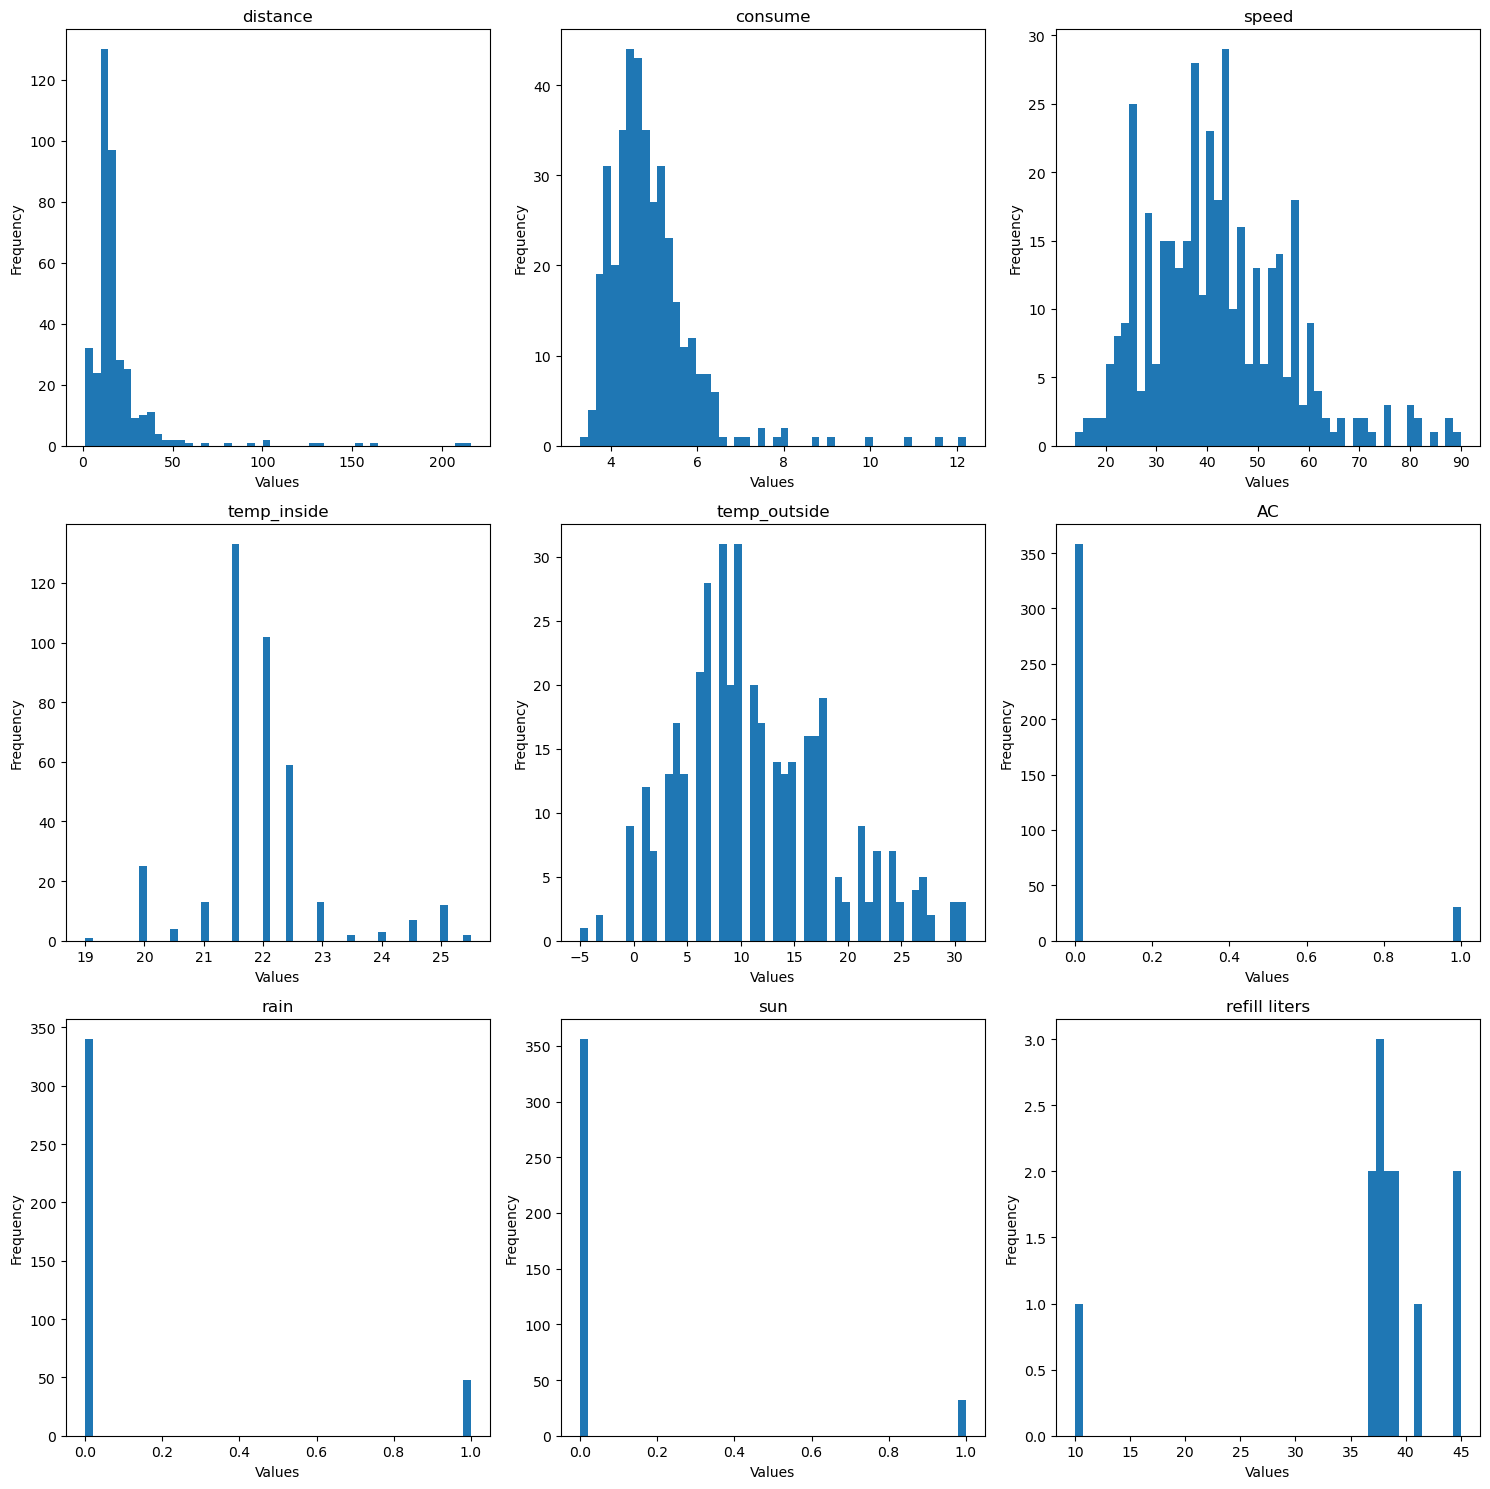

In [25]:
# Plot histograms for numerical columns
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3, ncols=3, figsize=(15, 15))

for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]  # Get the appropriate subplot
    
    # Exclude non-numeric values from the histogram
    numeric_values = gas_consum_df[column].loc[pd.to_numeric(gas_consum_df[column], errors='coerce').notnull()]
    
    ax.hist(numeric_values, bins=50)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

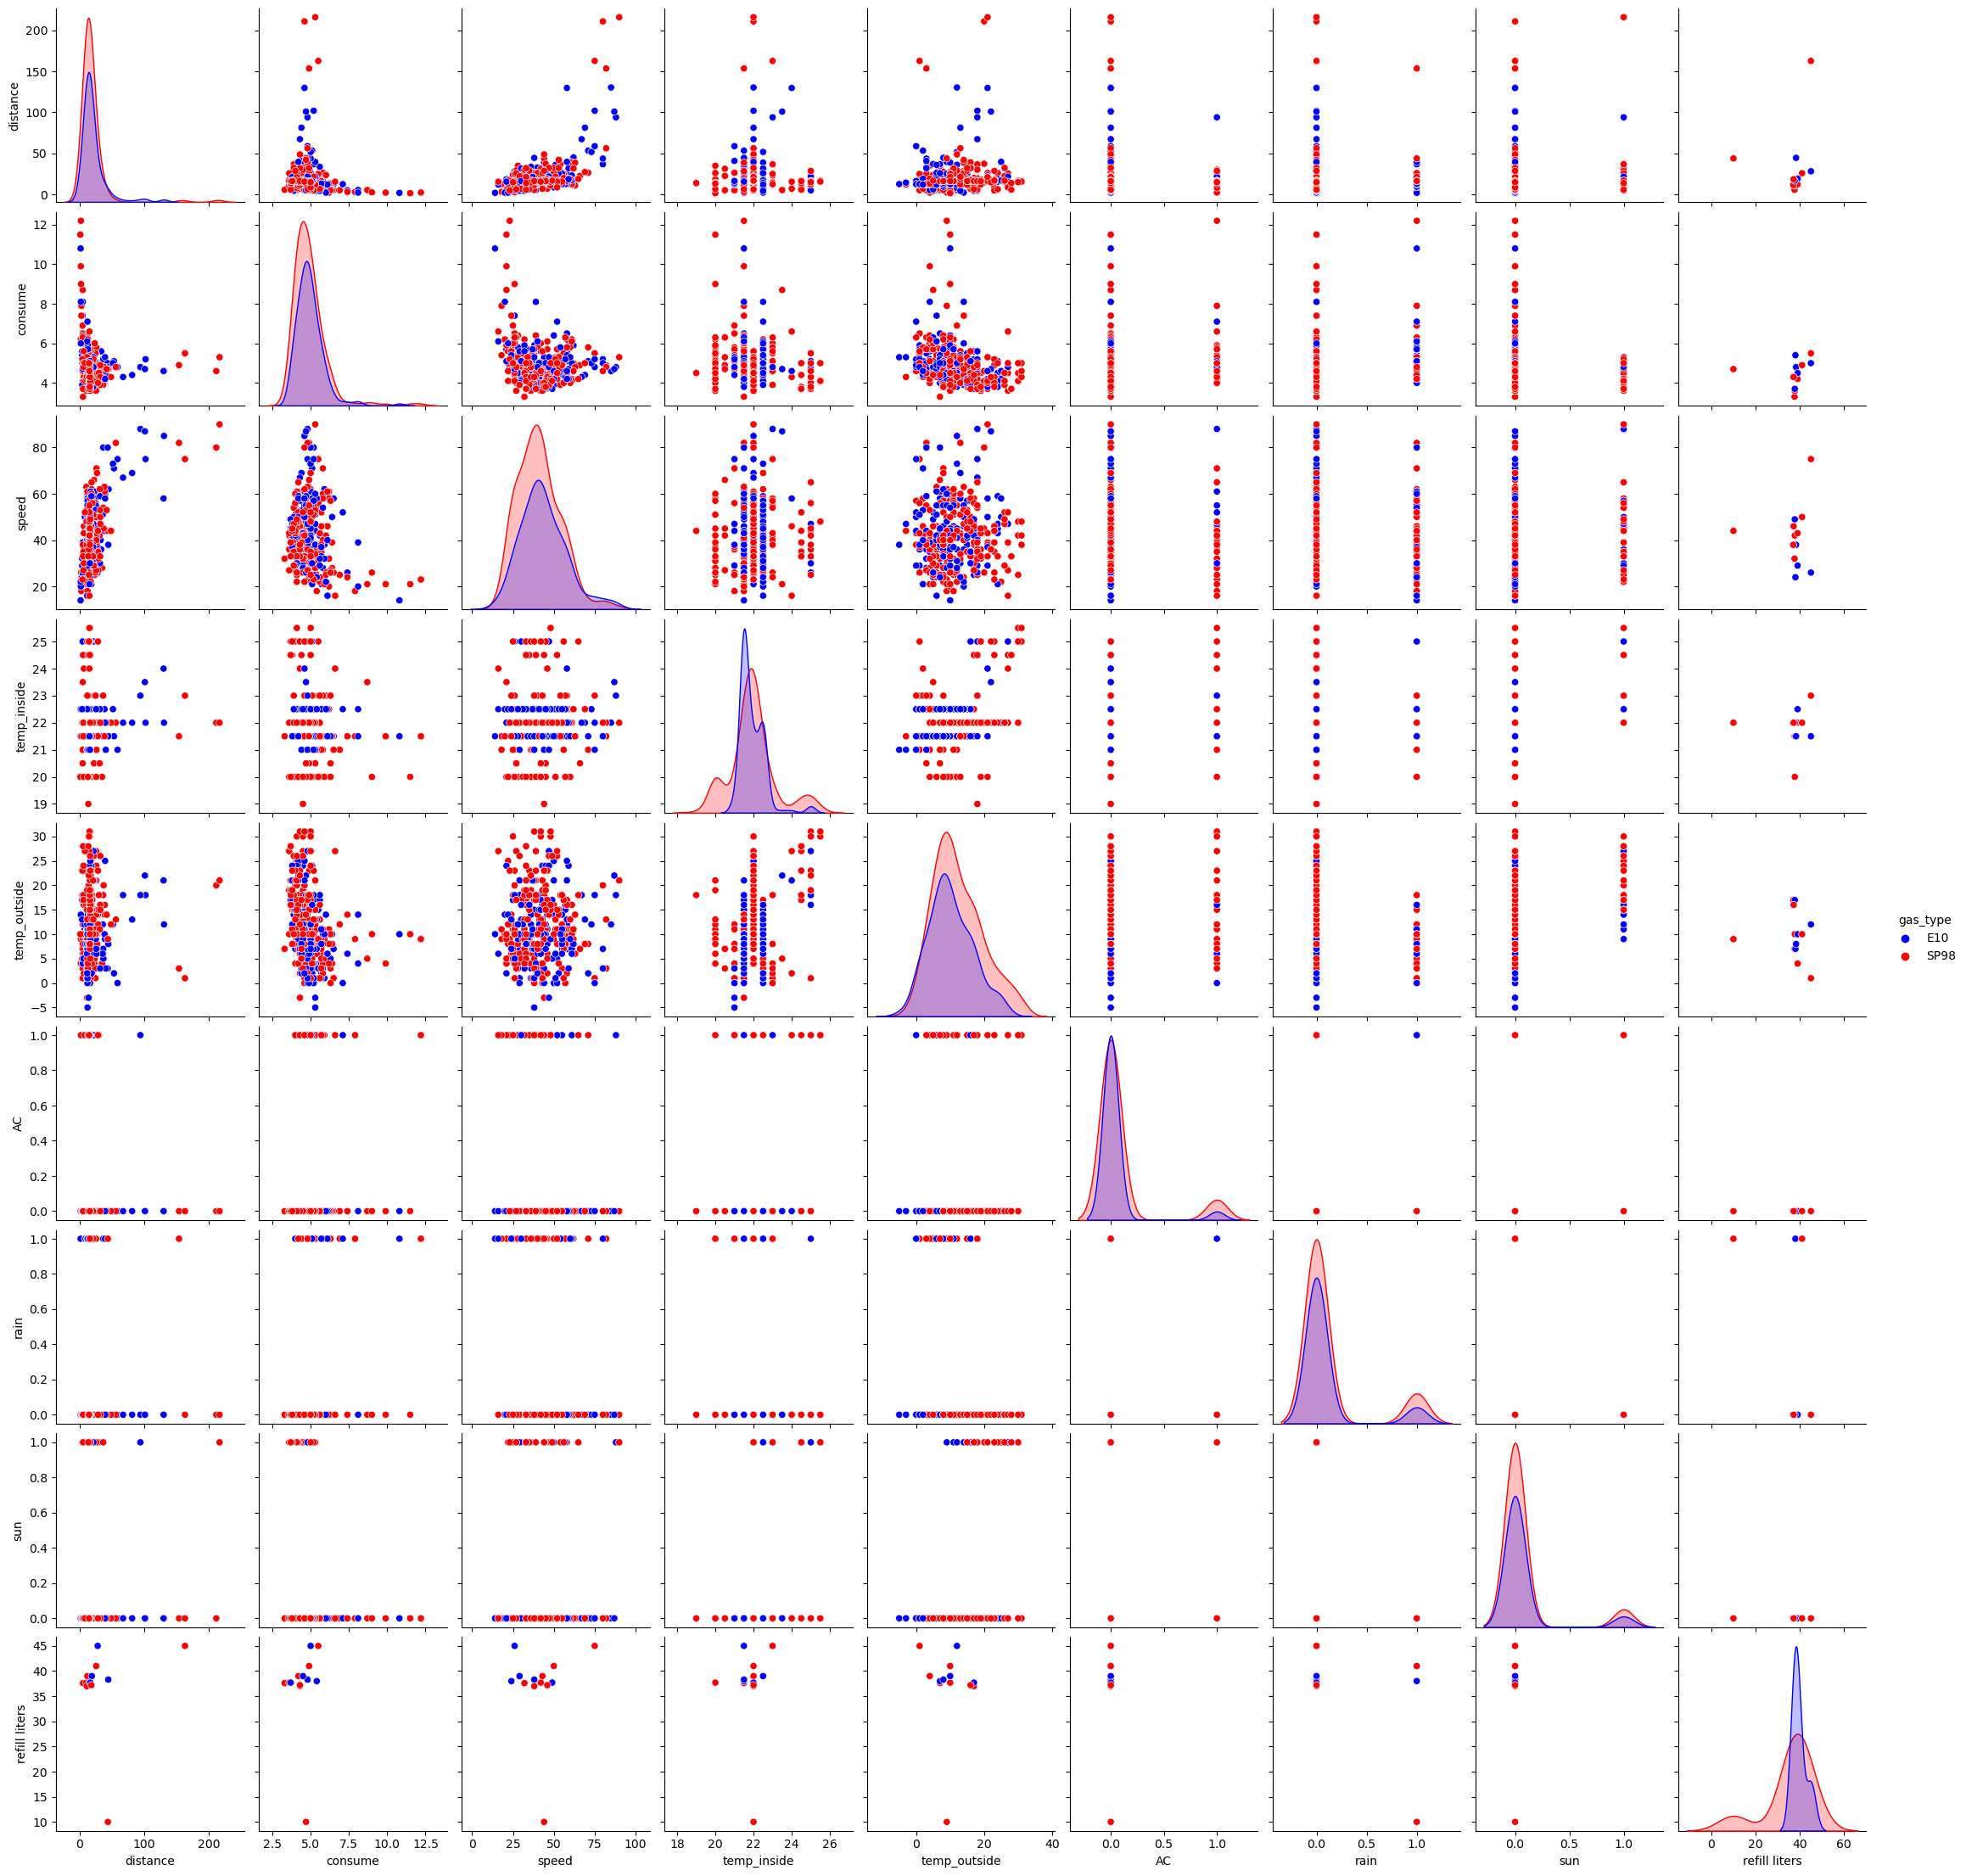

In [26]:
# Create a pair plot, showing data filtered by gas type
sns.pairplot(gas_consum_df, hue='gas_type', palette={'E10': 'blue', 'SP98': 'red'})

# Display the plot
plt.show()

## Outliers

We see outliers above in terms of distance that may make comparisons impossible between gas type. Let's have a closer look at our dataset.


### 20 drives with longest distances

In [59]:

# Sort the DataFrame by the "distance" column in descending order
sort_distances = gas_consum_df.sort_values(by='distance', ascending=False)

# Display the top 20 rows with the largest distance
top_20_dist = sort_distances.head(20)

top_20_dist

distance  L_per_100_km  speed  temp_inside  temp_outside  \
319     216.1           5.3     90         22.0            21   
318     211.0           4.6     80         22.0            20   
106     162.7           5.5     75         23.0             1   
55      153.5           4.9     82         21.5             3   
189     130.3           4.6     85         22.0            12   
334     129.7           4.6     58         24.0            21   
272     101.9           5.2     75         22.0            18   
333     100.9           4.7     87         23.5            22   
273      93.9           4.8     88         23.0            18   
188      81.2           4.4     69         22.0            13   
190      67.2           4.3     67         22.0            18   
178      58.7           4.8     75         21.0             0   
193      56.1           4.8     82         22.0            13   
162      53.2           5.1     71         21.5             2   
185      51.6           5.0     73         22.5            12   
285      48.6           4.3     44         22.0            12   
156      44.9           4.7     62         21.5             8   
171      44.4           4.8     38         21.5             8   
191      43.7           4.7     44         22.0             9   
164      43.5           5.0     80         21.5             3   

               specials  AC  rain  sun  refill liters refill gas  \
319                 sun   0     0    1            NaN        NaN   
318                 NaN   0     0    0            NaN        NaN   
106                 NaN   0     0    0           45.0       SP98   
55                 rain   0     1    0            NaN        NaN   
189                 NaN   0     0    0            NaN        NaN   
334                  ac   0     0    0            NaN        NaN   
272                 NaN   0     0    0            NaN        NaN   
333                 NaN   0     0    0            NaN        NaN   
273              AC sun   1     0    1            NaN        NaN   
188                 NaN   0     0    0            NaN        NaN   
190                 NaN   0     0    0            NaN        NaN   
178                 NaN   0     0    0            NaN        NaN   
193                 NaN   0     0    0            NaN        NaN   
162                 NaN   0     0    0            NaN        NaN   
185                 NaN   0     0    0            NaN        NaN   
285                 NaN   0     0    0            NaN        NaN   
156                 NaN   0     0    0            NaN        NaN   
171                 NaN   0     0    0           38.3        E10   
191  half rain half sun   0     1    0           10.0       SP98   
164                 NaN   0     0    0            NaN        NaN   

     gas_type_E10  gas_type_SP98  actual_consumption  price_per_L   gas_cost  
319             0              1             11.4533        1.940  22.219402  
318             0              1              9.7060        1.940  18.829640  
106             0              1              8.9485        1.940  17.360090  
55              0              1              7.5215        1.940  14.591710  
189             1              0              5.9938        1.863  11.166449  
334             1              0              5.9662        1.863  11.115031  
272             1              0              5.2988        1.863   9.871664  
333             1              0              4.7423        1.863   8.834905  
273             1              0              4.5072        1.863   8.396914  
188             1              0              3.5728        1.863   6.656126  
190             1              0              2.8896        1.863   5.383325  
178             1              0              2.8176        1.863   5.249189  
193             0              1              2.6928        1.940   5.224032  
162             1              0              2.7132        1.863   5.054692  
185             1        

### Drives with highest speed

In [73]:
# Sort the DataFrame by the "speed" column in descending order
sort_speed = gas_consum_df.sort_values(by='speed', ascending=False)

# Display the top 20 rows with the largest distance
top_20_speed = sort_speed.head(20)

top_20_speed

distance  L_per_100_km  speed  temp_inside  temp_outside specials  AC  \
319     216.1           5.3     90         22.0            21      sun   0   
273      93.9           4.8     88         23.0            18   AC sun   1   
333     100.9           4.7     87         23.5            22      NaN   0   
189     130.3           4.6     85         22.0            12      NaN   0   
55      153.5           4.9     82         21.5             3     rain   0   
193      56.1           4.8     82         22.0            13      NaN   0   
155      36.6           5.2     80         21.5             7     rain   0   
164      43.5           5.0     80         21.5             3      NaN   0   
318     211.0           4.6     80         22.0            20      NaN   0   
106     162.7           5.5     75         23.0             1      NaN   0   
178      58.7           4.8     75         21.0             0      NaN   0   
272     101.9           5.2     75         22.0            18      NaN   0   
185      51.6           5.0     73         22.5            12      NaN   0   
162      53.2           5.1     71         21.5             2      NaN   0   
101      26.2           5.8     71         21.0             8  AC rain   1   
188      81.2           4.4     69         22.0            13      NaN   0   
232      27.1           5.0     69         22.5             8      NaN   0   
190      67.2           4.3     67         22.0            18      NaN   0   
113      22.4           4.9     66         20.5             7      NaN   0   
299      18.7           4.2     65         25.0            18   sun ac   1   

     rain  sun  refill liters refill gas  gas_type_E10  gas_type_SP98  \
319     0    1            NaN        NaN             0              1   
273     0    1            NaN        NaN             1              0   
333     0    0            NaN        NaN             1              0   
189     0    0            NaN        NaN             1              0   
55      1    0            NaN        NaN             0              1   
193     0    0            NaN        NaN             0              1   
155     1    0            NaN        NaN             1              0   
164     0    0            NaN        NaN             1              0   
318     0    0            NaN        NaN             0              1   
106     0    0           45.0       SP98             0              1   
178     0    0            NaN        NaN             1              0   
272     0    0            NaN        NaN             1              0   
185     0    0            NaN        NaN             1              0   
162     0    0            NaN        NaN             1              0   
101     1    0            NaN        NaN             0              1   
188     0    0            NaN        NaN             1              0   
232     0    0            NaN        NaN             0              1   
190     0    0            NaN        NaN             1              0   
113     0    0            NaN        NaN             0              1   
299     0    1            NaN        NaN             0              1   

     actual_consumption  price_per_L   gas_cost gas_type  
319             11.4533        1.940  22.219402     SP98  
273              4.5072        1.863   8.396914      E10  
333              4.7423        1.863   8.834905      E10  
189              5.9938        1.863  11.166449      E10  
55               7.5215        1.940  14.591710     SP98  
193              2.6928        1.940   5.224032     SP98  
155              1.9032        1.863   3.545662      E10  
164              2.1750        1.863   4.052025      E10  
318              9.7060        1.940  18.829640     SP98  
106              8.9485        1.940  17.360090     SP98  
178              2.8176        1.863   5.249189      E10  
272              5.2988        1.863   9.871664      E10  
185              2.5800        1.863   4.806540      E10  
162   

### Highest consumption rate (L / 100)

In [33]:
# Sort the DataFrame by the "consume" column in descending order
sort_consum = gas_consum_df.sort_values(by='consume', ascending=False)

# Display the top 10 rows with the largest distance
top_30_consum = sort_consum.head(30)

top_30_consum

distance  consume  speed  temp_inside  temp_outside specials gas_type  \
61        2.1     12.2     23         21.5             9      NaN     SP98   
210       1.3     11.5     21         20.0            10      NaN     SP98   
147       1.7     10.8     14         21.5            10     rain      E10   
45        2.0      9.9     21         21.5             4      NaN     SP98   
206       2.4      9.0     26         20.0            10      NaN     SP98   
112       5.1      8.7     21         23.5             5      NaN     SP98   
254       2.0      8.1     20         22.5            14      NaN      E10   
160       5.1      8.1     39         21.5             4      NaN      E10   
60        2.9      7.9     18         21.5             9  AC rain     SP98   
37        4.9      7.4     26         21.5             6      NaN      E10   
198       2.9      7.4     24         21.5            14      NaN     SP98   
181      12.3      7.1     52         22.5             0  AC snow      E10   
103       4.9      6.9     25         21.0            12     rain     SP98   
373      15.3      6.6     16         24.0            27       ac     SP98   
107       4.9      6.5     26         21.0             1      NaN     SP98   
39       12.3      6.5     58         21.5             7      NaN      E10   
5         8.3      6.4     50         21.5            10      NaN      E10   
8         4.9      6.4     26         21.5             4      NaN      E10   
131       5.1      6.4     39         21.5             4      NaN     SP98   
54        6.1      6.4     28         21.5             8      NaN     SP98   
165       6.1      6.3     26         21.5             5      NaN      E10   
115       4.9      6.3     27         20.5             3      NaN     SP98   
207       4.9      6.3     26         20.0            10      NaN     SP98   
125      12.2      6.3     57         23.0             0     snow     SP98   
57       12.3      6.2     61         21.5             8      NaN     SP98   
230      13.0      6.2     32         22.5             4      NaN     SP98   
71        2.0      6.2     20         21.5            10      NaN     SP98   
85       12.3      6.2     58         20.0            11     rain     SP98   
53       13.1      6.1     46         21.5             6     rain     SP98   
245      11.8      6.1     16         22.5             6     rain      E10   

     AC  rain  sun  refill liters refill gas  
61    1     1    0            NaN        NaN  
210   0     0    0            NaN        NaN  
147   0     1    0            NaN        NaN  
45    0     0    0            NaN        NaN  
206   0     0    0            NaN        NaN  
112   0     0    0            NaN        NaN  
254   0     0    0            NaN        NaN  
160   0     0    0            NaN        NaN  
60    1     1    0            NaN        NaN  
37    0     0    0            NaN        NaN  
198   0     0    0            NaN        NaN  
181   1     1    0            NaN        NaN  
103   0     1    0            NaN        NaN  
373   1     0    0            NaN        NaN  
107   0     0    0            NaN        NaN  
39    0     0    0            NaN        NaN  
5     0     0    0            NaN        NaN  
8     0     0    0            NaN        NaN  
131   0     0    0            NaN        NaN  
54    0     0    0            NaN        NaN  
165   0     0    0            NaN        NaN  
115   0     0    0            NaN        NaN  
207   0     0    0            NaN        NaN  
125   0     1    0            NaN        NaN  
57    0     0    0            NaN        NaN  
230   0     0    0            NaN        NaN  
71    0     0    0            NaN        NaN  
85    0     1    0            NaN        NaN  
53    0     1    0            NaN        NaN  
245   0     1    0            NaN        NaN

In [32]:
sort_consum.tail(30)


distance  consume  speed  temp_inside  temp_outside specials gas_type  \
306      16.0      3.9     40         22.0            10      NaN     SP98   
300      36.5      3.9     54         23.0            18      sun     SP98   
372      32.1      3.9     47         22.0            26      NaN     SP98   
280      16.0      3.9     42         22.0             8      NaN     SP98   
3        12.9      3.9     36         21.5            14      NaN      E10   
347      17.2      3.9     35         22.0            16      NaN      E10   
385      16.0      3.8     45         25.0            19      NaN     SP98   
201      22.2      3.8     42          NaN            15      NaN     SP98   
379      16.7      3.8     44         24.5            23      sun     SP98   
268      16.0      3.8     42          NaN             8      NaN      E10   
342      15.4      3.8     47         22.0            24      NaN      E10   
270      16.0      3.8     41         22.0            12      NaN      E10   
282      16.0      3.8     40         22.0             8      NaN     SP98   
304      16.0      3.8     42         22.0            11      NaN     SP98   
343      16.0      3.8     42         22.0            17      NaN      E10   
335      16.6      3.8     43         21.5            16      NaN      E10   
341      21.0      3.8     37         22.0            21      NaN      E10   
383      16.0      3.7     39         24.5            18      NaN     SP98   
325      16.6      3.7     49         22.0            17      NaN      E10   
353      16.0      3.7     44         22.0            16      NaN     SP98   
209      25.9      3.7     39         20.0            21      NaN     SP98   
375      11.9      3.7     33         25.0            19      NaN     SP98   
337      16.0      3.7     45         22.0            17      NaN      E10   
381       5.5      3.7     33         24.5            28      sun     SP98   
382      13.6      3.7     33         24.5            28      sun     SP98   
82       10.5      3.6     42         20.0            10      NaN     SP98   
208      18.1      3.6     36         20.0            19      NaN     SP98   
370      16.0      3.6     43         22.0            19      NaN     SP98   
320      25.5      3.6     27         22.0            27      sun     SP98   
44        5.4      3.3     32         21.5             7      NaN     SP98   

     AC  rain  sun  refill liters refill gas  
306   0     0    0            NaN        NaN  
300   0     0    1            NaN        NaN  
372   0     0    0            NaN        NaN  
280   0     0    0            NaN        NaN  
3     0     0    0            NaN        NaN  
347   0     0    0            NaN        NaN  
385   0     0    0            NaN        NaN  
201   0     0    0            NaN        NaN  
379   0     0    1            NaN        NaN  
268   0     0    0            NaN        NaN  
342   0     0    0            NaN        NaN  
270   0     0    0            NaN        NaN  
282   0     0    0            NaN        NaN  
304   0     0    0            NaN        NaN  
343   0     0    0            NaN        NaN  
335   0     0    0            NaN        NaN  
341   0     0    0            NaN        NaN  
383   0     0    0            NaN        NaN  
325   0     0    0           37.7        E10  
353   0     0    0            NaN        NaN  
209   0     0    0            NaN        NaN  
375   0     0    0            NaN        NaN  
337   0     0    0            NaN        NaN  
381   0     0    1            NaN        NaN  
382   0     0    1            NaN        NaN  
82    0     0    0           37.7       SP98  
208   0     0    0            NaN        NaN  
370   0     0    0            NaN        NaN  
320   0     0    1            NaN        NaN  
44    0     0    0           37.6       SP98

In [ ]:
# At first sight, consumpton seems more correlated to short distances (hence lower average speed), rain, and lower outside temperature / air conditioning than gas type.

In [34]:
#Encode gas_type

gas_consum_df = pd.get_dummies(gas_consum_df, columns=['gas_type'])

gas_consum_df.head()

distance  consume  speed  temp_inside  temp_outside specials  AC  rain  \
0      28.0      5.0     26         21.5            12      NaN   0     0   
1      12.0      4.2     30         21.5            13      NaN   0     0   
2      11.2      5.5     38         21.5            15      NaN   0     0   
3      12.9      3.9     36         21.5            14      NaN   0     0   
4      18.5      4.5     46         21.5            15      NaN   0     0   

   sun  refill liters refill gas  gas_type_E10  gas_type_SP98  
0    0           45.0        E10             1              0  
1    0            NaN        NaN             1              0  
2    0            NaN        NaN             1              0  
3    0            NaN        NaN             1              0  
4    0            NaN        NaN             1              0

## Correlation Matrix

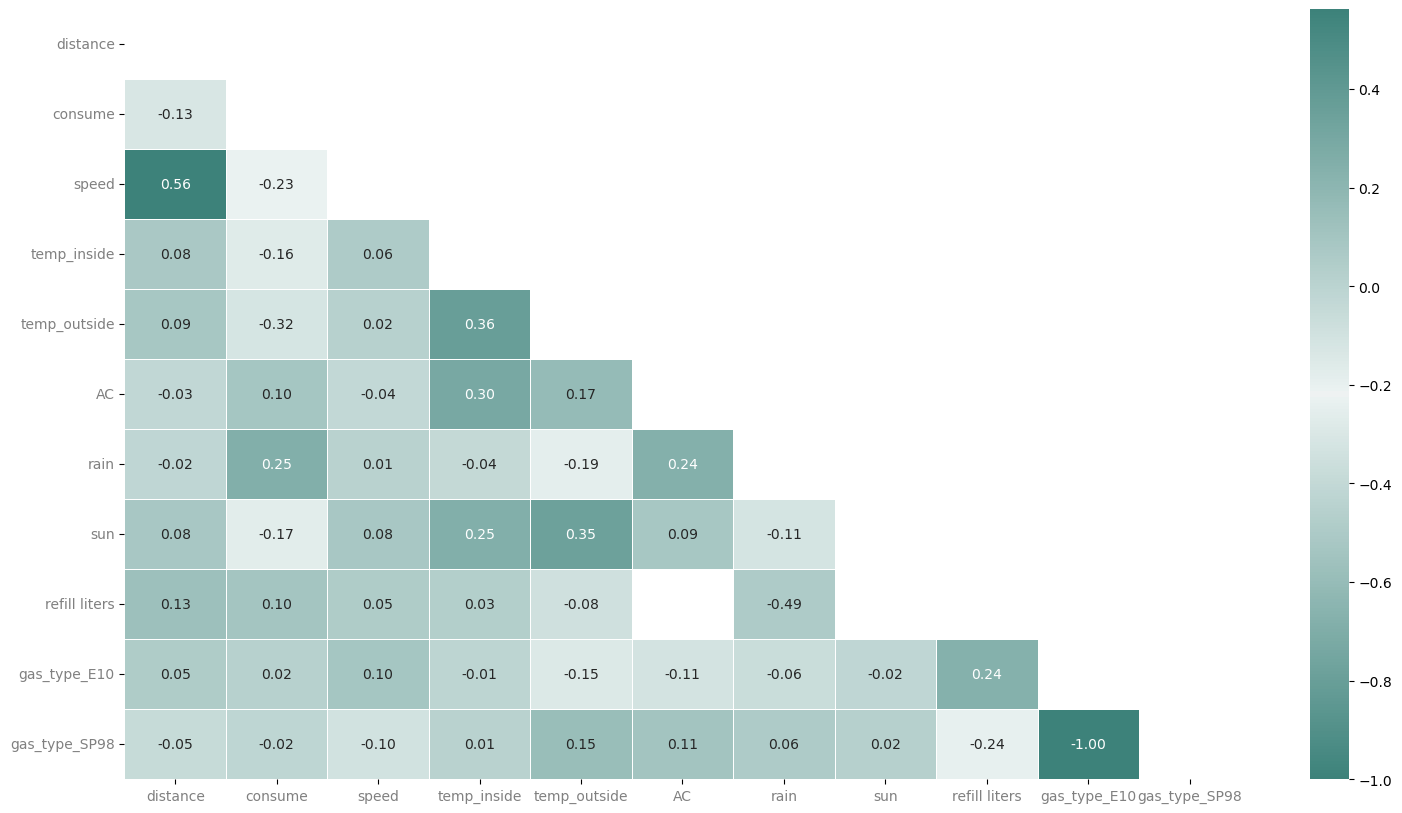

In [35]:
#Plot correlation matrix

correlations_matrix = gas_consum_df.corr()
fig, ax = plt.subplots(figsize=(18, 10))

mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

In [ ]:
#We see little correlation between gas type and average consumption

In [43]:
#Add a column for the actual consumption per drive (instead of L / 100 km)

# Rename the 'consume' column
gas_consum_df = gas_consum_df.rename(columns={'consume': 'L_per_100_km'})

# Add the 'actual_consumption' column
gas_consum_df['actual_consumption'] = gas_consum_df['distance'] * gas_consum_df['L_per_100_km'] / 100

gas_consum_df

distance  L_per_100_km  speed  temp_inside  temp_outside specials  AC  \
0        28.0           5.0     26         21.5            12      NaN   0   
1        12.0           4.2     30         21.5            13      NaN   0   
2        11.2           5.5     38         21.5            15      NaN   0   
3        12.9           3.9     36         21.5            14      NaN   0   
4        18.5           4.5     46         21.5            15      NaN   0   
..        ...           ...    ...          ...           ...      ...  ..   
383      16.0           3.7     39         24.5            18      NaN   0   
384      16.1           4.3     38         25.0            31       AC   1   
385      16.0           3.8     45         25.0            19      NaN   0   
386      15.4           4.6     42         25.0            31       AC   1   
387      14.7           5.0     25         25.0            30       AC   1   

     rain  sun  refill liters refill gas  gas_type_E10  gas_type_SP98  \
0       0    0           45.0        E10             1              0   
1       0    0            NaN        NaN             1              0   
2       0    0            NaN        NaN             1              0   
3       0    0            NaN        NaN             1              0   
4       0    0            NaN        NaN             1              0   
..    ...  ...            ...        ...           ...            ...   
383     0    0            NaN        NaN             0              1   
384     0    0            NaN        NaN             0              1   
385     0    0            NaN        NaN             0              1   
386     0    0            NaN        NaN             0              1   
387     0    0            NaN        NaN             0              1   

     actual_consumption  
0                1.4000  
1                0.5040  
2                0.6160  
3                0.5031  
4                0.8325  
..                  ...  
383              0.5920  
384              0.6923  
385              0.6080  
386              0.7084  
387              0.7350  

[388 rows x 14 columns]

## Check costs

In [44]:
#Add Gas prices
#SP98 = 1,940 €/l 
#SP95 E10 = 1,863 €/l 
#Source: https://carbu.com/france/prixmoyens on June 20, 2023

SP98 = 1.940
SP95E10 = 1.863

# Create a column and fill with the above proces
gas_consum_df['price_per_L'] = np.where(gas_consum_df['gas_type_E10'] == 1, SP95E10, SP98)
gas_consum_df

distance  L_per_100_km  speed  temp_inside  temp_outside specials  AC  \
0        28.0           5.0     26         21.5            12      NaN   0   
1        12.0           4.2     30         21.5            13      NaN   0   
2        11.2           5.5     38         21.5            15      NaN   0   
3        12.9           3.9     36         21.5            14      NaN   0   
4        18.5           4.5     46         21.5            15      NaN   0   
..        ...           ...    ...          ...           ...      ...  ..   
383      16.0           3.7     39         24.5            18      NaN   0   
384      16.1           4.3     38         25.0            31       AC   1   
385      16.0           3.8     45         25.0            19      NaN   0   
386      15.4           4.6     42         25.0            31       AC   1   
387      14.7           5.0     25         25.0            30       AC   1   

     rain  sun  refill liters refill gas  gas_type_E10  gas_type_SP98  \
0       0    0           45.0        E10             1              0   
1       0    0            NaN        NaN             1              0   
2       0    0            NaN        NaN             1              0   
3       0    0            NaN        NaN             1              0   
4       0    0            NaN        NaN             1              0   
..    ...  ...            ...        ...           ...            ...   
383     0    0            NaN        NaN             0              1   
384     0    0            NaN        NaN             0              1   
385     0    0            NaN        NaN             0              1   
386     0    0            NaN        NaN             0              1   
387     0    0            NaN        NaN             0              1   

     actual_consumption  price_per_L  
0                1.4000        1.863  
1                0.5040        1.863  
2                0.6160        1.863  
3                0.5031        1.863  
4                0.8325        1.863  
..                  ...          ...  
383              0.5920        1.940  
384              0.6923        1.940  
385              0.6080        1.940  
386              0.7084        1.940  
387              0.7350        1.940  

[388 rows x 15 columns]

In [45]:
#Create a column to compute the cost of gas per drive

gas_consum_df['gas_cost'] = gas_consum_df['actual_consumption'] * gas_consum_df['price_per_L']
gas_consum_df

distance  L_per_100_km  speed  temp_inside  temp_outside specials  AC  \
0        28.0           5.0     26         21.5            12      NaN   0   
1        12.0           4.2     30         21.5            13      NaN   0   
2        11.2           5.5     38         21.5            15      NaN   0   
3        12.9           3.9     36         21.5            14      NaN   0   
4        18.5           4.5     46         21.5            15      NaN   0   
..        ...           ...    ...          ...           ...      ...  ..   
383      16.0           3.7     39         24.5            18      NaN   0   
384      16.1           4.3     38         25.0            31       AC   1   
385      16.0           3.8     45         25.0            19      NaN   0   
386      15.4           4.6     42         25.0            31       AC   1   
387      14.7           5.0     25         25.0            30       AC   1   

     rain  sun  refill liters refill gas  gas_type_E10  gas_type_SP98  \
0       0    0           45.0        E10             1              0   
1       0    0            NaN        NaN             1              0   
2       0    0            NaN        NaN             1              0   
3       0    0            NaN        NaN             1              0   
4       0    0            NaN        NaN             1              0   
..    ...  ...            ...        ...           ...            ...   
383     0    0            NaN        NaN             0              1   
384     0    0            NaN        NaN             0              1   
385     0    0            NaN        NaN             0              1   
386     0    0            NaN        NaN             0              1   
387     0    0            NaN        NaN             0              1   

     actual_consumption  price_per_L  gas_cost  
0                1.4000        1.863  2.608200  
1                0.5040        1.863  0.938952  
2                0.6160        1.863  1.147608  
3                0.5031        1.863  0.937275  
4                0.8325        1.863  1.550947  
..                  ...          ...       ...  
383              0.5920        1.940  1.148480  
384              0.6923        1.940  1.343062  
385              0.6080        1.940  1.179520  
386              0.7084        1.940  1.374296  
387              0.7350        1.940  1.425900  

[388 rows x 16 columns]

In [56]:
# Filter the DataFrame based on the 'gas_type' column
df_e10 = gas_consum_df[gas_consum_df['gas_type_E10'] == 1]
df_sp98 = gas_consum_df[gas_consum_df['gas_type_SP98'] == 1]

In [57]:
df_e10.describe()

distance  L_per_100_km       speed  temp_inside  temp_outside  \
count  160.000000    160.000000  160.000000   157.000000    160.000000   
mean    21.096250      4.931250   43.506250    21.917197     10.118750   
std     20.307234      0.900956   14.077949     0.659854      6.392185   
min      1.700000      3.700000   14.000000    21.000000     -5.000000   
25%     12.075000      4.400000   35.000000    21.500000      6.000000   
50%     15.400000      4.800000   42.000000    21.500000      9.000000   
75%     21.200000      5.300000   51.000000    22.500000     14.250000   
max    130.300000     10.800000   88.000000    25.000000     27.000000   

               AC        rain         sun  refill liters  gas_type_E10  \
count  160.000000  160.000000  160.000000       5.000000         160.0   
mean     0.043750    0.100000    0.075000      39.600000           1.0   
std      0.205181    0.300942    0.264218       3.056959           0.0   
min      0.000000    0.000000    0.000000      37.700000           1.0   
25%      0.000000    0.000000    0.000000      38.000000           1.0   
50%      0.000000    0.000000    0.000000      38.300000           1.0   
75%      0.000000    0.000000    0.000000      39.000000           1.0   
max      1.000000    1.000000    1.000000      45.000000           1.0   

       gas_type_SP98  actual_consumption  price_per_L    gas_cost  
count          160.0          160.000000      160.000  160.000000  
mean             0.0            1.008933        1.863    1.879641  
std              0.0            0.956864        0.000    1.782637  
min              0.0            0.120000        1.863    0.223560  
25%              0.0            0.576250        1.863    1.073554  
50%              0.0            0.693700        1.863    1.292363  
75%              0.0            1.042200        1.863    1.941619  
max              0.0            5.993800        1.863   11.166449

In [58]:
df_sp98.describe()

distance  L_per_100_km       speed  temp_inside  temp_outside  \
count  228.000000    228.000000  228.000000   219.000000    228.000000   
mean    18.639912      4.899123   40.820175    21.938356     12.228070   
std     24.179598      1.118408   13.170122     1.201906      7.271373   
min      1.300000      3.300000   16.000000    19.000000     -3.000000   
25%     11.800000      4.200000   32.000000    21.500000      7.000000   
50%     14.150000      4.700000   39.500000    22.000000     11.000000   
75%     18.150000      5.225000   48.000000    22.000000     17.000000   
max    216.100000     12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  refill liters  gas_type_E10  \
count  228.000000  228.000000  228.000000       8.000000         228.0   
mean     0.100877    0.140351    0.087719      35.562500           0.0   
std      0.301829    0.348115    0.283509      10.672787           0.0   
min      0.000000    0.000000    0.000000      10.000000           0.0   
25%      0.000000    0.000000    0.000000      37.150000           0.0   
50%      0.000000    0.000000    0.000000      37.650000           0.0   
75%      0.000000    0.000000    0.000000      39.500000           0.0   
max      1.000000    1.000000    1.000000      45.000000           0.0   

       gas_type_SP98  actual_consumption   price_per_L    gas_cost  
count          228.0          228.000000  2.280000e+02  228.000000  
mean             1.0            0.883618  1.940000e+00    1.714220  
std              0.0            1.214646  2.002798e-15    2.356414  
min              1.0            0.124000  1.940000e+00    0.240560  
25%              1.0            0.531000  1.940000e+00    1.030140  
50%              1.0            0.663200  1.940000e+00    1.286608  
75%              1.0            0.837900  1.940000e+00    1.625526  
max              1.0           11.453300  1.940000e+00   22.219402

From the data, we see that despite its higher cost per litter, drives with SP98 have been actually slightly cheaper on average per drive, and per 100 km.
E10 show a slightly higher consumption per 100 km, so SP98 may be eventually cheaper indeed.
E10 drives had longer distances and higher speed on average though, so average consumption and gas cost can be biased by those factors.
It is to be noted that E10 has been used with notably lower temperatures on average thas well, which could also have a negative impact on consumption.


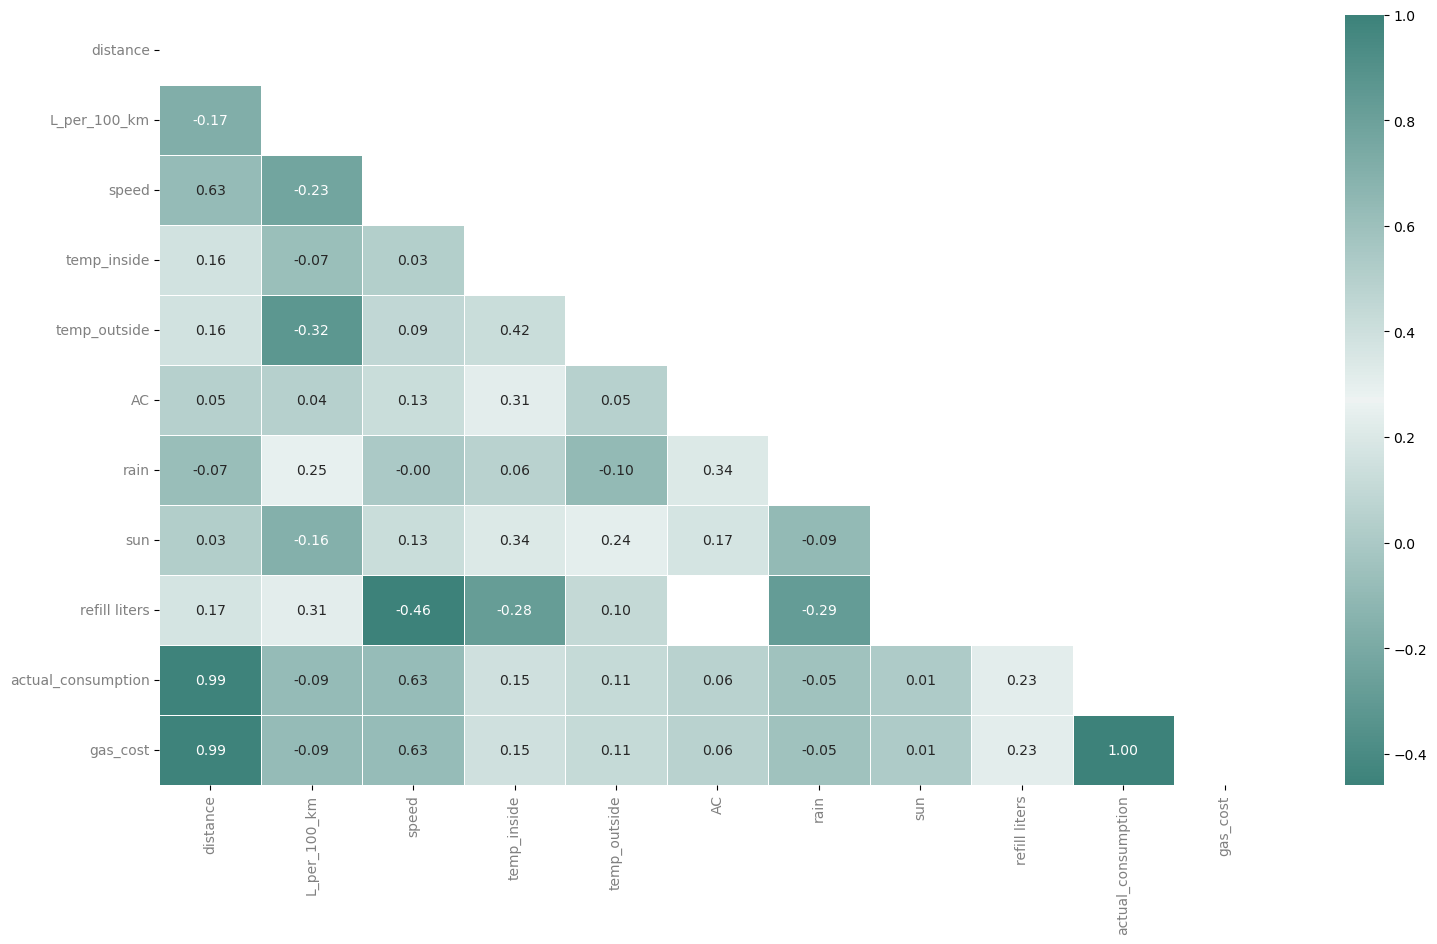

In [63]:
#Plot correlation matrix for E10

correlations_matrix = df_e10[['distance', 'L_per_100_km', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'refill liters', 'actual_consumption', 'gas_cost']].corr()
fig, ax = plt.subplots(figsize=(18, 10))

mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

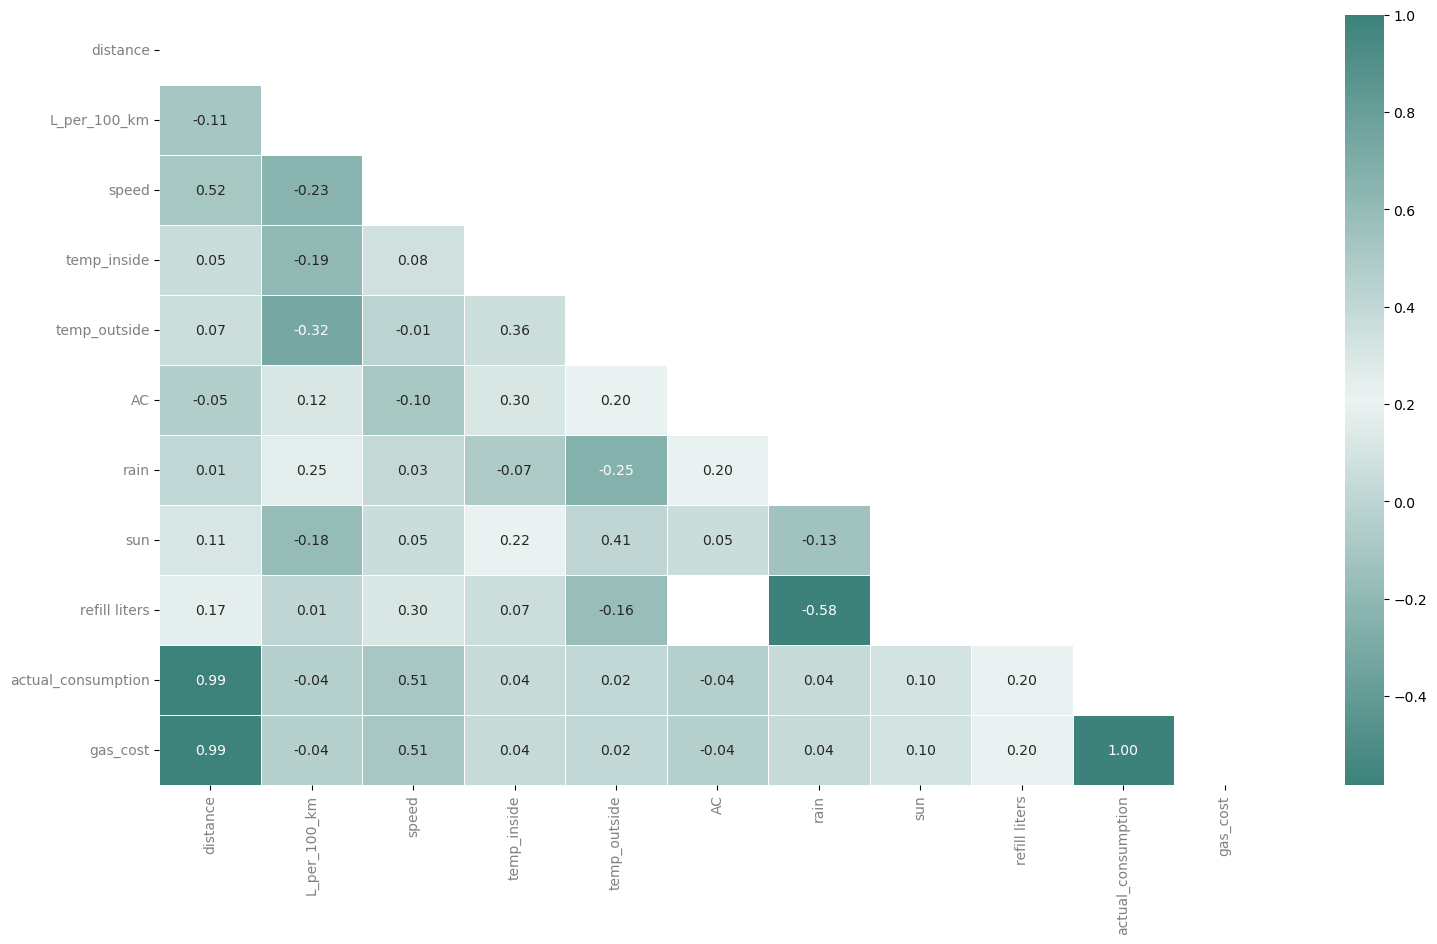

In [64]:
#Plot correlation matrix for SP98

correlations_matrix = df_sp98[['distance', 'L_per_100_km', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'refill liters', 'actual_consumption', 'gas_cost']].corr()
fig, ax = plt.subplots(figsize=(18, 10))

mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

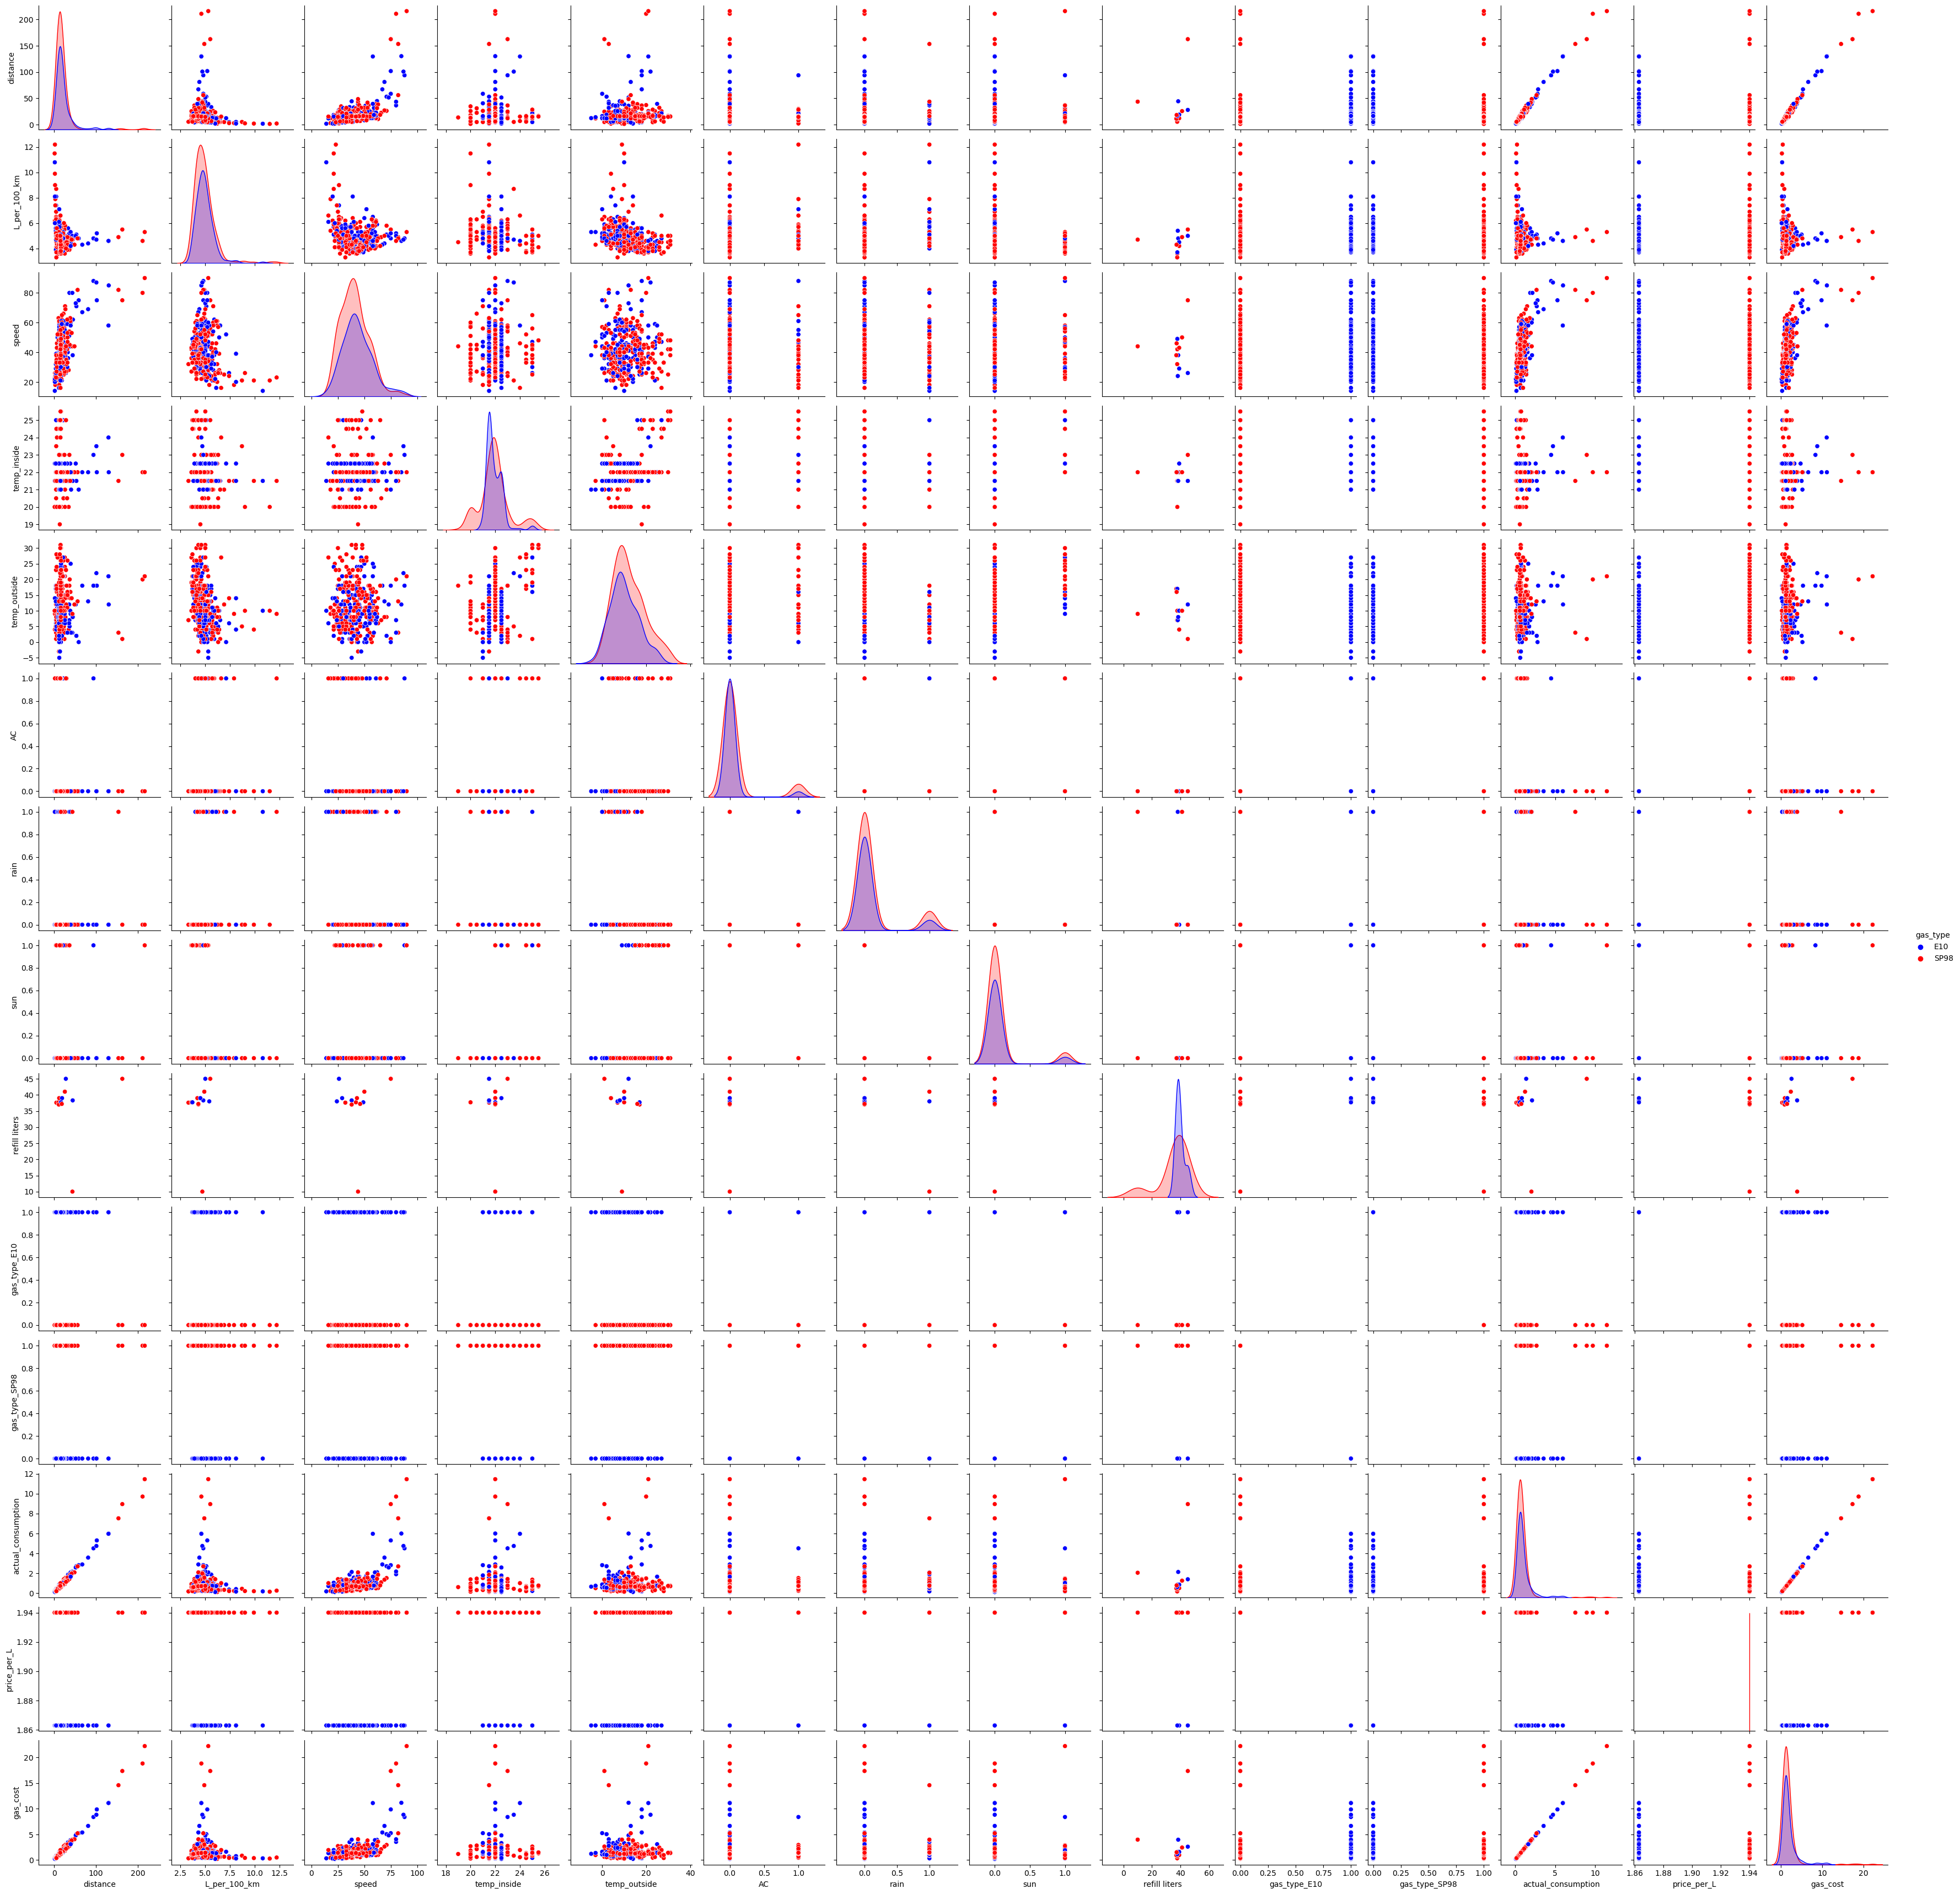

In [69]:
#Pairplot again, but need to add back the gas_type for the color...

# Create a new column 'gas_type' based on 'gas_type_E10' and 'gas_type_SP98'
gas_consum_df['gas_type'] = gas_consum_df['gas_type_E10'].map({1: 'E10', 0: 'SP98'})

# Specify the hue as 'gas_type' and set the palette colors
sns.pairplot(gas_consum_df, hue='gas_type', palette={'E10': 'blue', 'SP98': 'red'})

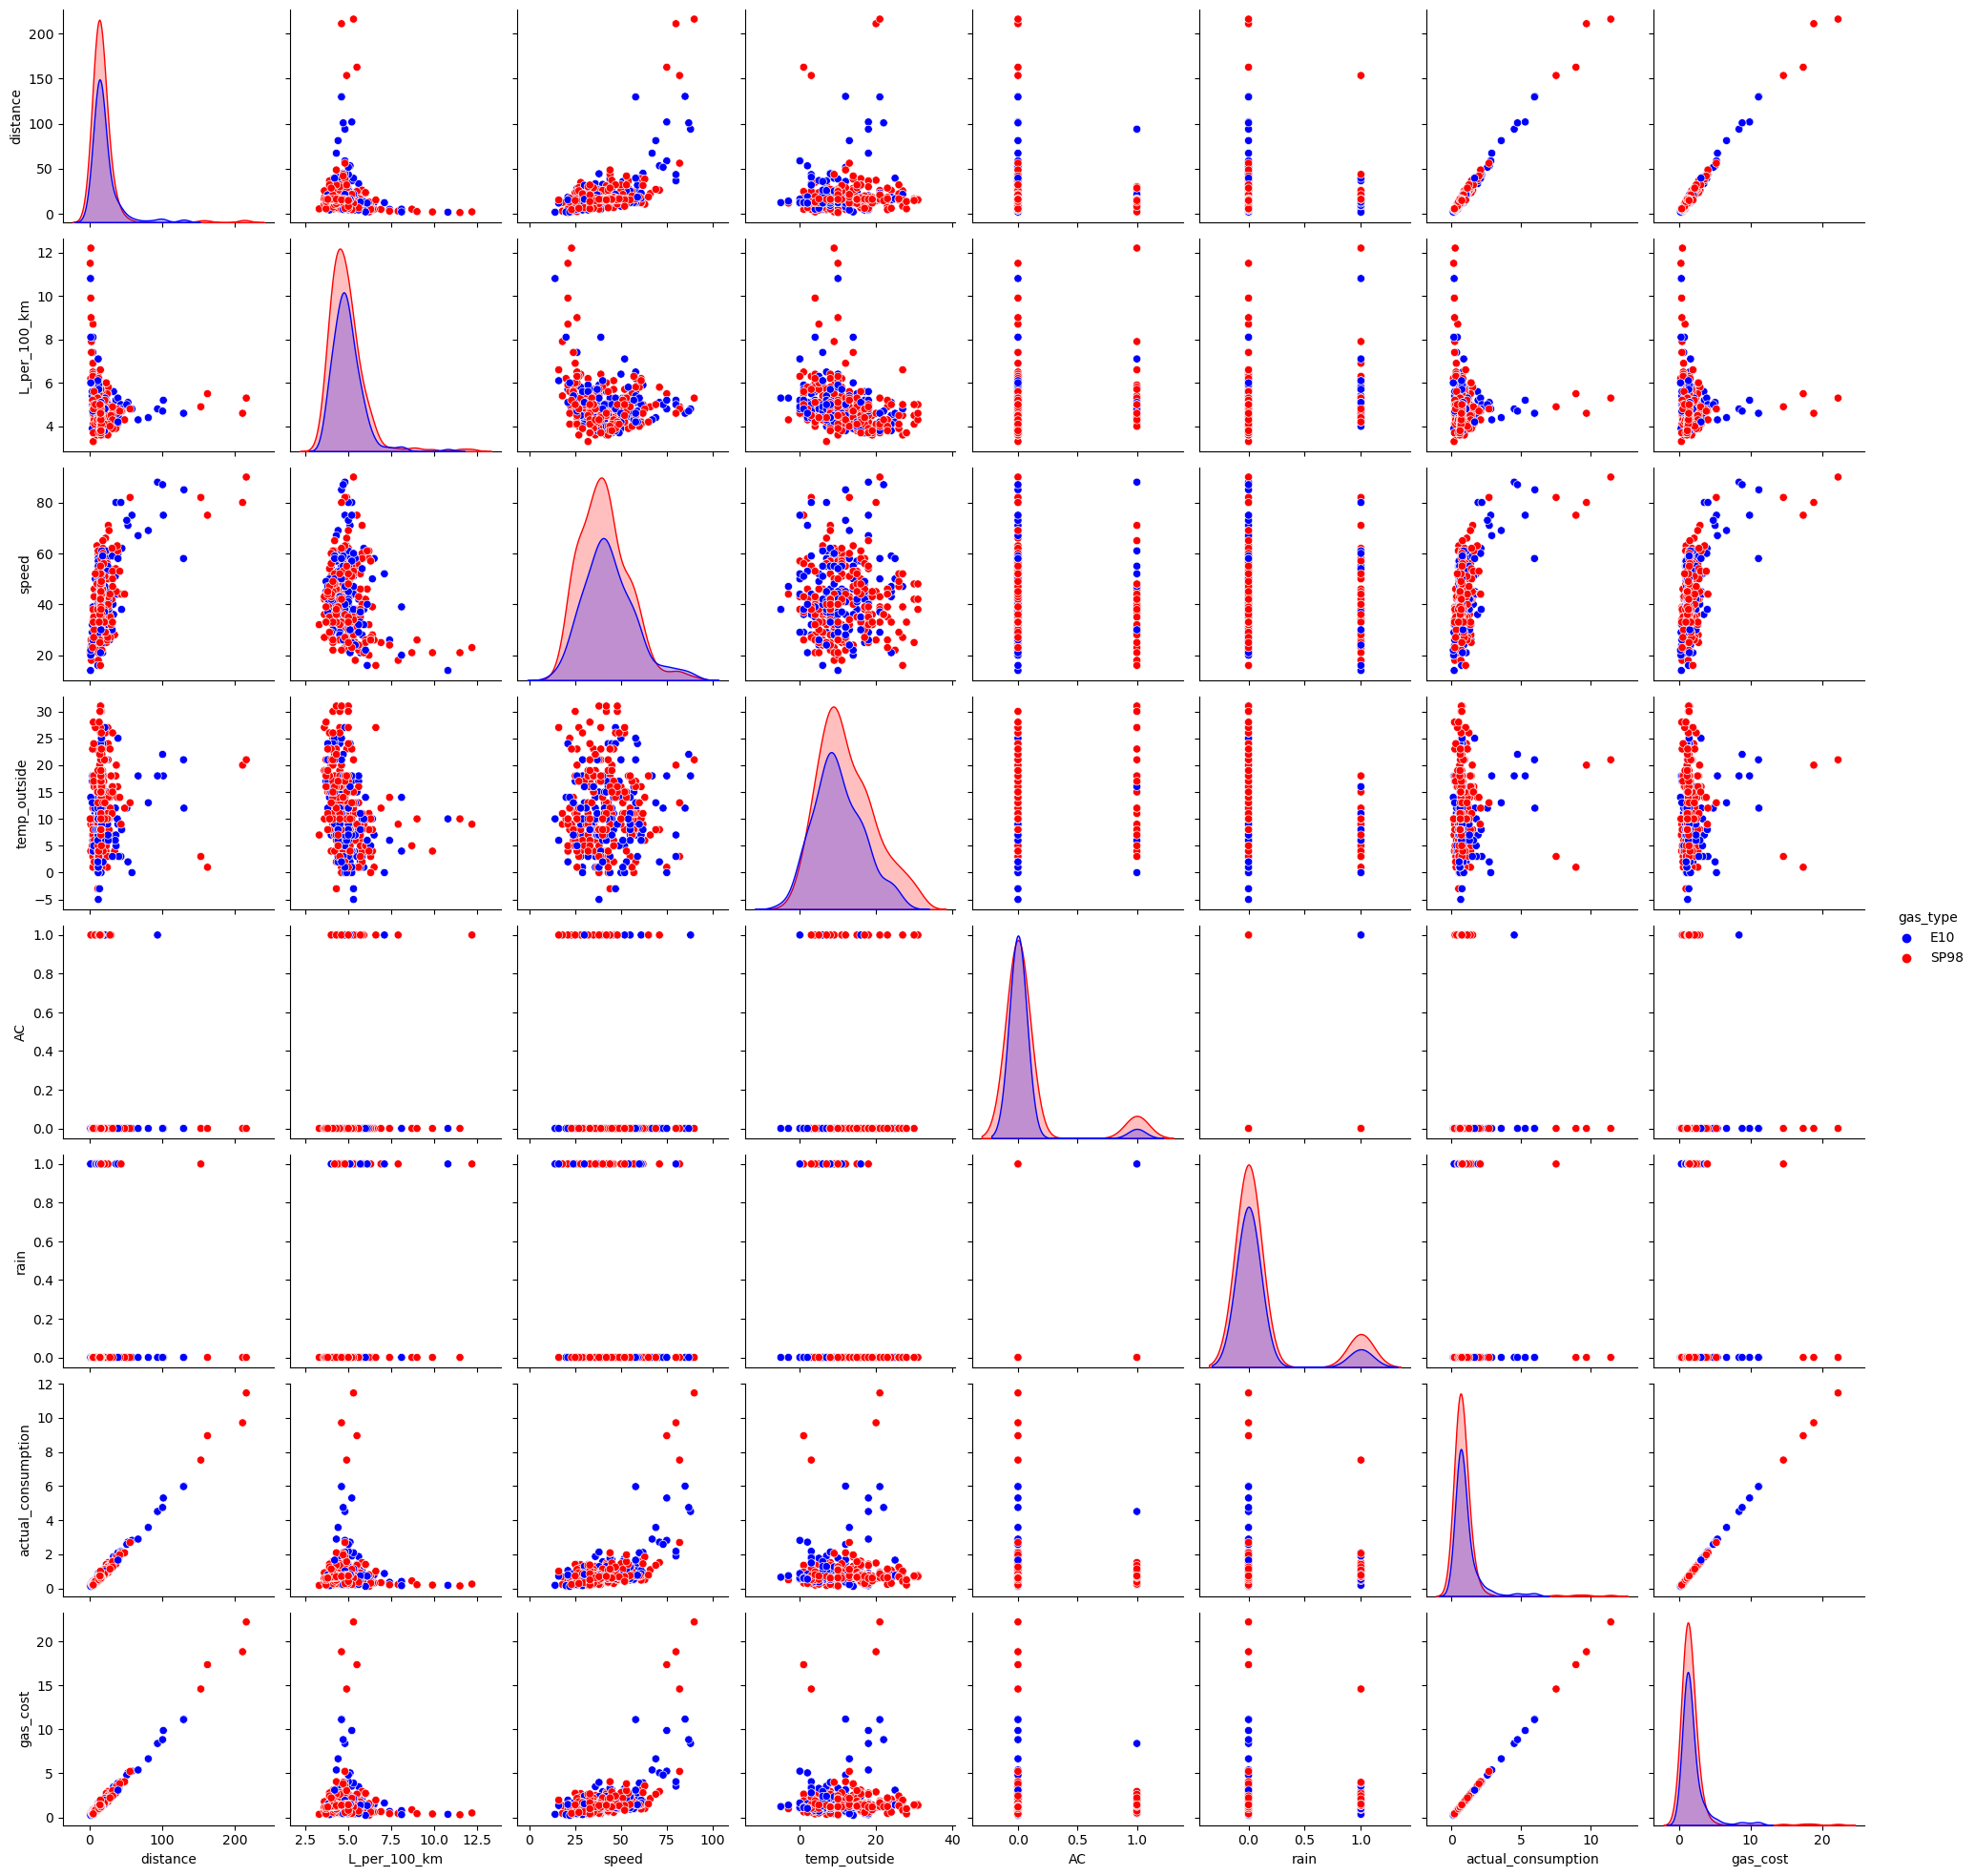

In [72]:
#For better readability, let's get rid of some unnecessary columns:

# Select the columns to include in the pairplot (excluding the ones to remove)
columns_to_include = ['distance', 'L_per_100_km', 'speed', 'temp_outside', 'AC', 'rain', 'actual_consumption', 'gas_cost', 'gas_type']

# Create a new DataFrame with only the selected columns
subset_df = gas_consum_df[columns_to_include]

# Plot the pairplot using the subset DataFrame
sns.pairplot(subset_df, hue='gas_type', palette={'E10': 'blue', 'SP98': 'red'})

We will need to get rid of outliers before implementing machine learning models.
Let's drop distances above 60 km

In [76]:
gas_consum_filtered = gas_consum_df[gas_consum_df['distance'] <= 60]


In [80]:
# Filter the DataFrame based on the 'gas_type' column
df_e10 = gas_consum_filtered[gas_consum_filtered['gas_type_E10'] == 1]
df_sp98 = gas_consum_filtered[gas_consum_filtered['gas_type_SP98'] == 1]

In [81]:
df_e10.describe()

distance  L_per_100_km       speed  temp_inside  temp_outside  \
count  153.000000    153.000000  153.000000   150.000000    153.000000   
mean    17.452941      4.943791   42.039216    21.883333      9.784314   
std     10.221759      0.917651   12.350625     0.633030      6.294255   
min      1.700000      3.700000   14.000000    21.000000     -5.000000   
25%     11.900000      4.400000   34.000000    21.500000      6.000000   
50%     15.400000      4.800000   41.000000    21.500000      9.000000   
75%     20.000000      5.300000   50.000000    22.500000     14.000000   
max     58.700000     10.800000   80.000000    25.000000     27.000000   

               AC        rain         sun  refill liters  gas_type_E10  \
count  153.000000  153.000000  153.000000       5.000000         153.0   
mean     0.039216    0.104575    0.071895      39.600000           1.0   
std      0.194745    0.307010    0.259163       3.056959           0.0   
min      0.000000    0.000000    0.000000      37.700000           1.0   
25%      0.000000    0.000000    0.000000      38.000000           1.0   
50%      0.000000    0.000000    0.000000      38.300000           1.0   
75%      0.000000    0.000000    0.000000      39.000000           1.0   
max      1.000000    1.000000    1.000000      45.000000           1.0   

       gas_type_SP98  actual_consumption  price_per_L    gas_cost  
count          153.0          153.000000      153.000  153.000000  
mean             0.0            0.839598        1.863    1.564171  
std              0.0            0.493902        0.000    0.920139  
min              0.0            0.120000        1.863    0.223560  
25%              0.0            0.566400        1.863    1.055203  
50%              0.0            0.688800        1.863    1.283234  
75%              0.0            0.970600        1.863    1.808228  
max              0.0            2.817600        1.863    5.249189

In [82]:
df_sp98.describe()

distance  L_per_100_km       speed  temp_inside  temp_outside  \
count  224.000000    224.000000  224.000000   215.000000    224.000000   
mean    15.654464      4.895982   40.089286    21.934884     12.245536   
std      8.413713      1.127174   12.060426     1.210523      7.228958   
min      1.300000      3.300000   16.000000    19.000000     -3.000000   
25%     11.800000      4.200000   32.000000    21.500000      7.000000   
50%     13.950000      4.700000   39.000000    22.000000     11.000000   
75%     17.300000      5.200000   48.000000    22.000000     17.000000   
max     56.100000     12.200000   82.000000    25.500000     31.000000   

               AC        rain         sun  refill liters  gas_type_E10  \
count  224.000000  224.000000  224.000000       7.000000         224.0   
mean     0.102679    0.138393    0.084821      34.214286           0.0   
std      0.304218    0.346085    0.279240      10.766991           0.0   
min      0.000000    0.000000    0.000000      10.000000           0.0   
25%      0.000000    0.000000    0.000000      37.100000           0.0   
50%      0.000000    0.000000    0.000000      37.600000           0.0   
75%      0.000000    0.000000    0.000000      38.350000           0.0   
max      1.000000    1.000000    1.000000      41.000000           0.0   

       gas_type_SP98  actual_consumption   price_per_L    gas_cost  
count          224.0          224.000000  2.240000e+02  224.000000  
mean             1.0            0.731409  1.940000e+00    1.418934  
std              0.0            0.373218  2.002877e-15    0.724044  
min              1.0            0.124000  1.940000e+00    0.240560  
25%              1.0            0.531000  1.940000e+00    1.030140  
50%              1.0            0.658950  1.940000e+00    1.278363  
75%              1.0            0.800825  1.940000e+00    1.553600  
max              1.0            2.692800  1.940000e+00    5.224032

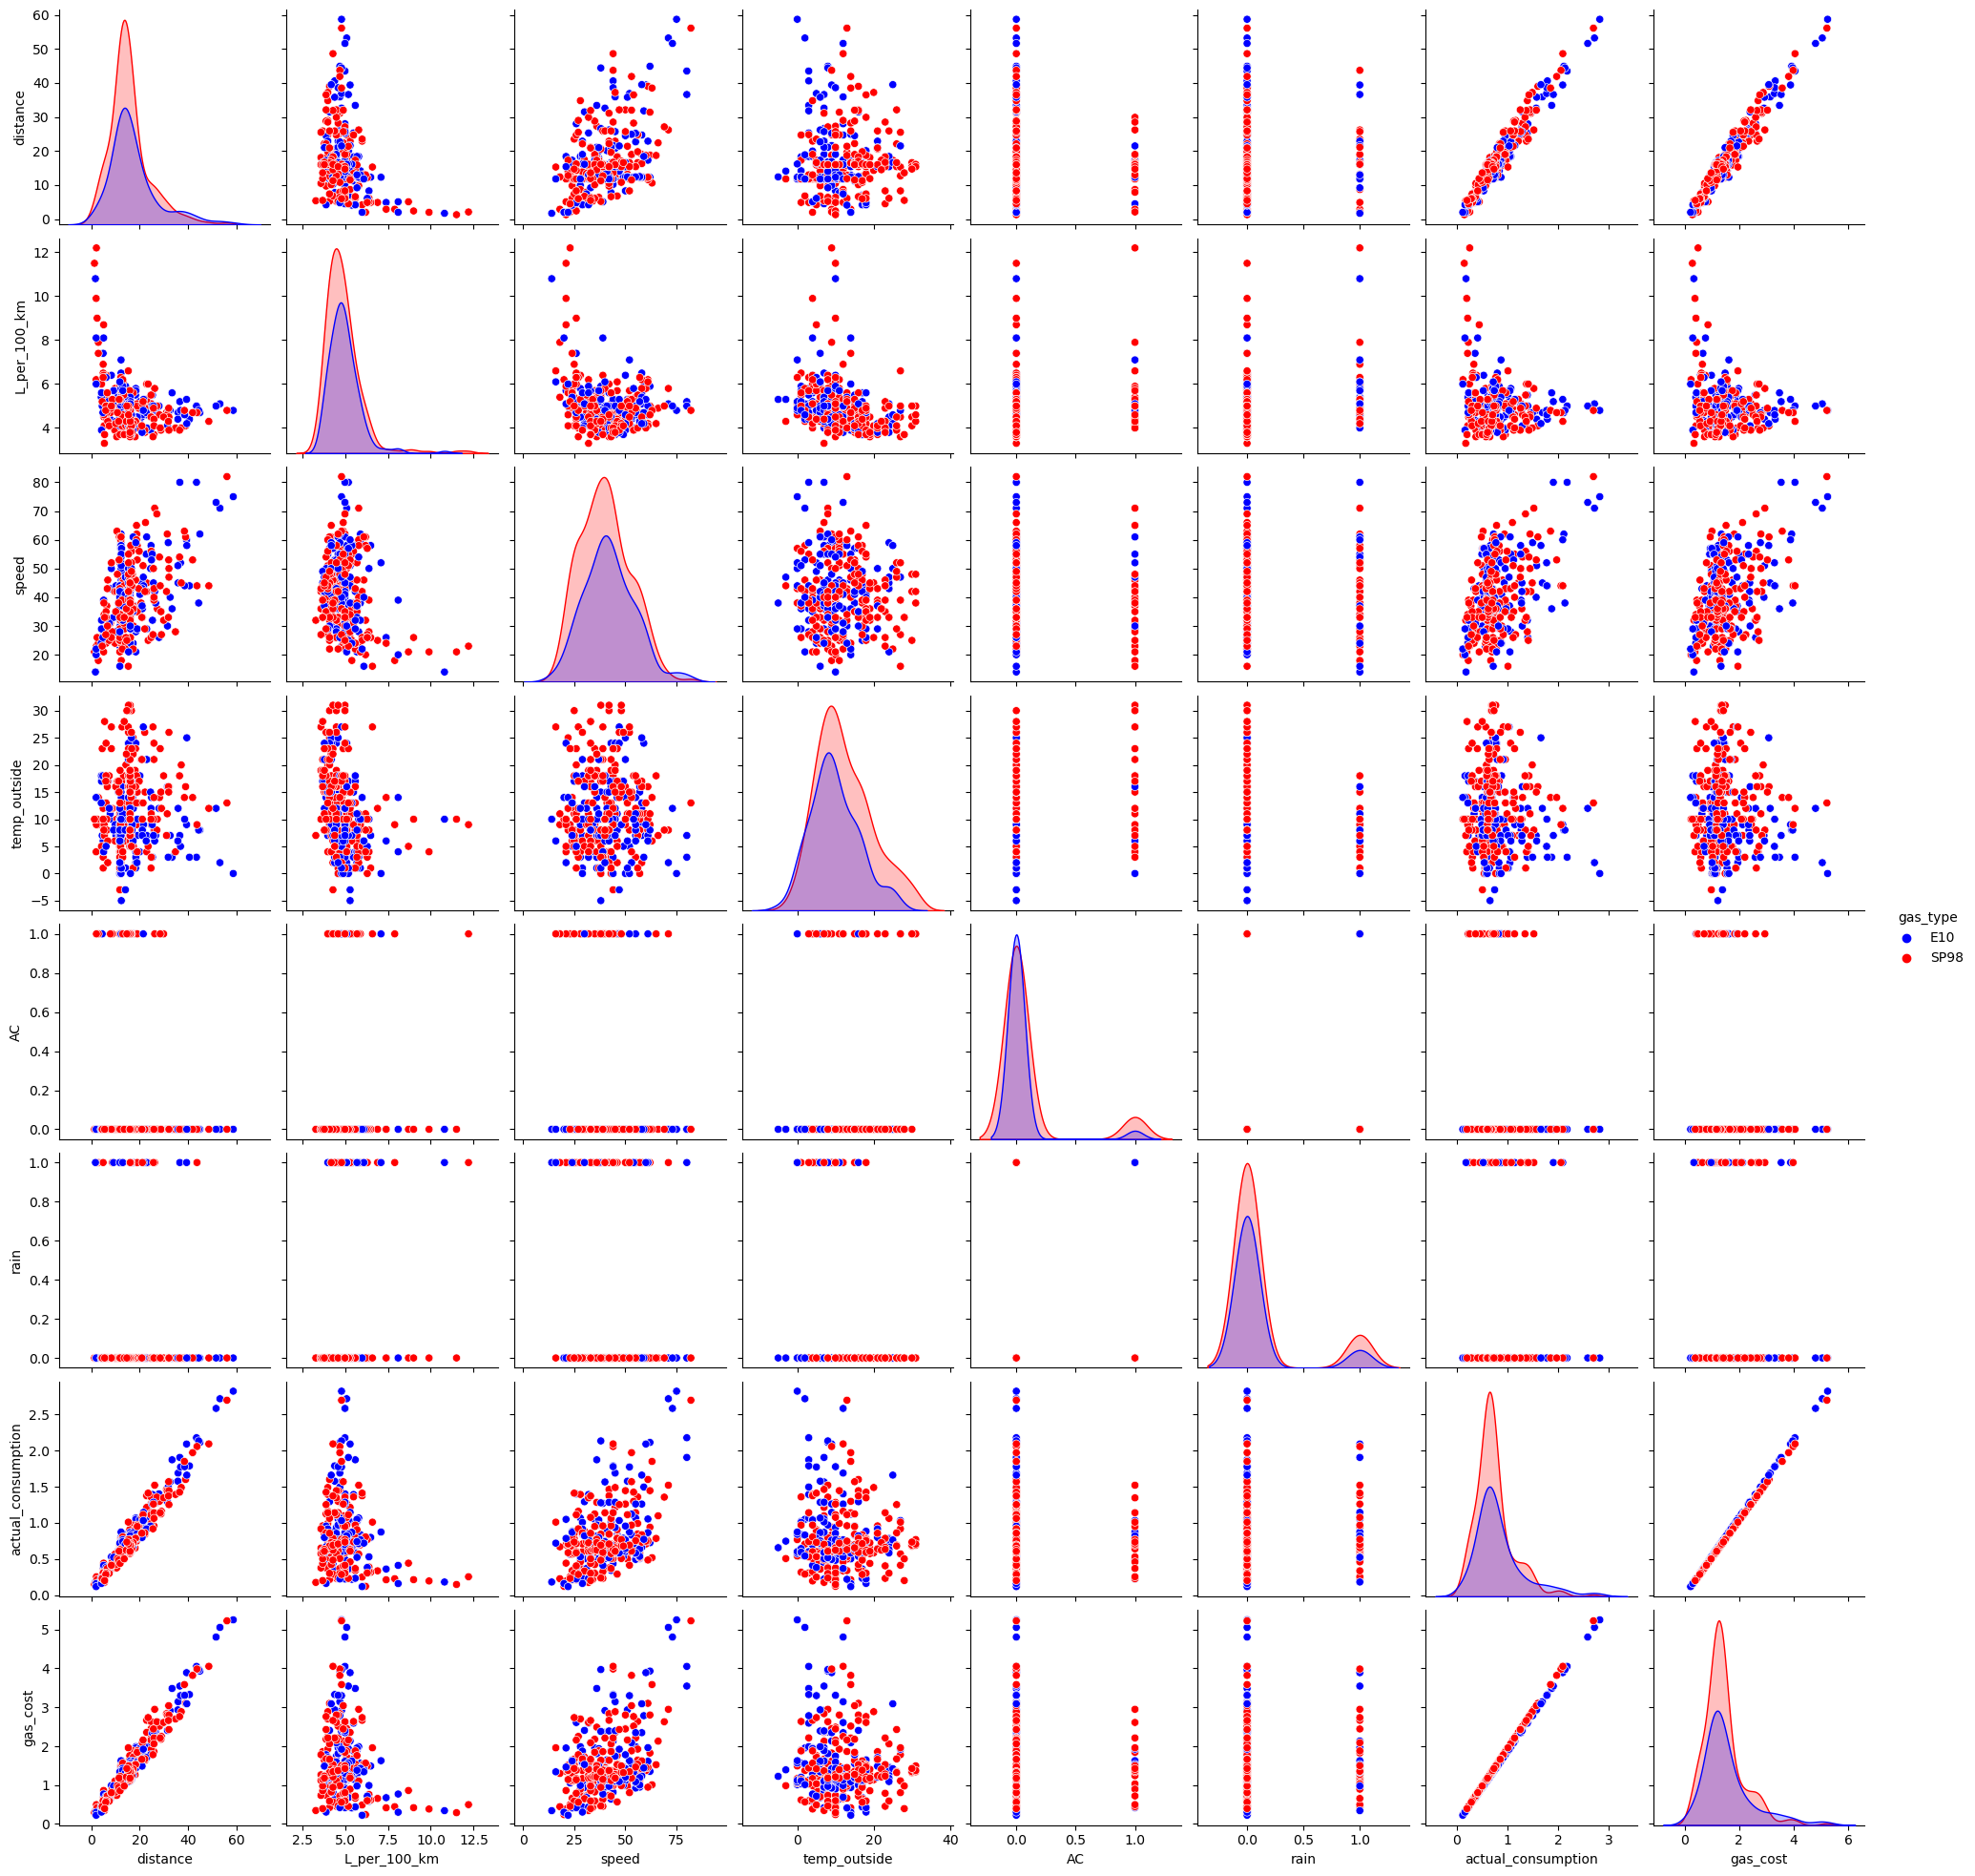

In [83]:
#Pairplots without outliers

# Select the columns to include in the pairplot (excluding the ones to remove)
columns_to_include = ['distance', 'L_per_100_km', 'speed', 'temp_outside', 'AC', 'rain', 'actual_consumption', 'gas_cost', 'gas_type']

# Create a new DataFrame with only the selected columns
subset_df = gas_consum_filtered[columns_to_include]

# Plot the pairplot using the subset DataFrame
sns.pairplot(subset_df, hue='gas_type', palette={'E10': 'blue', 'SP98': 'red'})

Even when removing the longest distances that are outliers (and for which SP98 drives are morecostly), we still from the data that SP98 have been actually slightly cheaper on average per drive, and per 100 km.
The dataset is too limited and biased (longer distances, higher speed, lower temperature for E10 drives) to draw confident conclusions on actual usage differences on gas cost.